# Multiple Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset: beer_foam.csv

Source: J.J. Hackbarth (2006). "Multivariate Analyses of Beer Foam Stand,"
Journal of the Institute of Brewing, Vol. 112, #1, pp. 17-24

Description: Measurements of wet foam height and beer height at various
time points for Shiner Bock at 20C. Author fits exponential decay model:
H(t) = H(0)*exp(-lambda*t)

Variables/Columns
TIME: Time from pour (seconds)  4-8
FOAM: Wet foam height (cm)  10-16
BEER: Beer height (cm)    18-24

In [2]:
# Read the csv file
foam = pd.read_csv("Resources/foam.csv")
foam.head()

,time,foam,beer
0,0,17.4,0.60
1,15,15.1,2.20
2,30,13.1,3.40
3,45,11.6,4.15
4,60,10.6,4.50


In [3]:
# Assign the data to X and y
X = foam[["foam", "beer"]]
y = foam["time"].values.reshape(-1, 1)
print(X.shape, y.shape)

(13, 2) (13, 1)


In [13]:
# Use train_test_split to create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Crearte a LinearRegression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
# Fit the model to the training set and calculate the scores for the training and test sets
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Test Score: {test_score}")

Training Score: 0.9907390608835369
Test Score: 0.9400818036481879


## Residuals
Because we can't easily plot our line in 3D space(or higher dimensions), we can use redidual plot ot check our predictions.

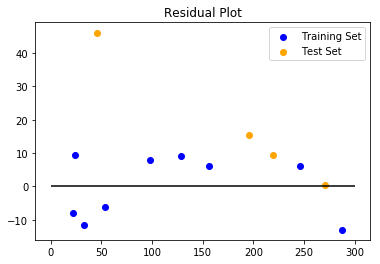

In [17]:
# Plot the Residuals for the training and test sets
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Set")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Test Set")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")